Dataset shape: (7043, 20)
Numeric columns: 3
Categorical columns: 15
Train size: (5634, 18) Test size: (1409, 18)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



Linear Regression Results:
RMSE: 14.56
R² Score: 0.663


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



Gradient Boosting Results:
RMSE: 14.34
R² Score: 0.673


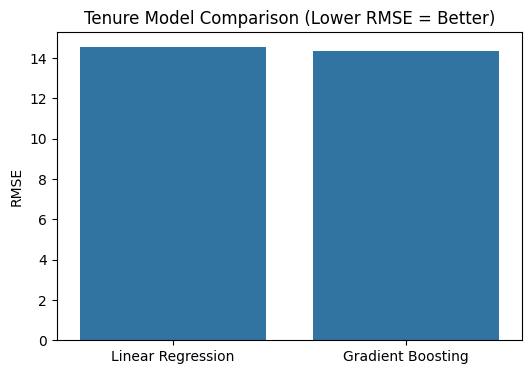

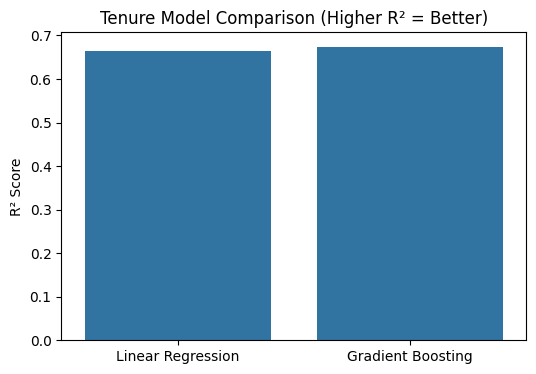


Saved: tenure_model_results.csv


In [1]:
# TENURE PREDICTION MODEL
# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Clean Dataset
df = pd.read_csv("telco_clean.csv")
print("Dataset shape:", df.shape)
df.head()

# 3. Prepare Data for Tenure Prediction
y = df["tenure"]
X = df.drop(columns=["tenure", "ChurnFlag"])  

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

# 4. Preprocessing Pipelines
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# 6. Baseline Model - Linear Regression
lin_reg = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("\nLinear Regression Results:")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R² Score: {r2_lin:.3f}")

# 7. Advanced Model - Gradient Boosting
gbr = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(random_state=42))
])

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Results:")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R² Score: {r2_gbr:.3f}")

# 8. Comparison Visualization
models = ["Linear Regression", "Gradient Boosting"]
rmse_scores = [rmse_lin, rmse_gbr]
r2_scores = [r2_lin, r2_gbr]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=rmse_scores)
plt.title("Tenure Model Comparison (Lower RMSE = Better)")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=r2_scores)
plt.title("Tenure Model Comparison (Higher R² = Better)")
plt.ylabel("R² Score")
plt.show()

# 9. Save Model Results
results = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_scores,
    "R2_Score": r2_scores
})
results.to_csv("tenure_model_results.csv", index=False)
print("\nSaved: tenure_model_results.csv")
